# Práctica 3 - Regresión

## Introducción a la Ciencia de Datos, Maestría en Ciencias de la Computación, CICESE

### Francisco Regalado

**1 de octubre del 2024**

## **Intrucciones de la práctica**
Esta práctica consiste en predecir el valor de una variable a partir de un conjunto de variables predictoras en un dataset de venta de casas en Italia. La variable a predecir será el precio de una casa.

Se deberá realizar:
* La limpieza de los datos.
* Un análisis exploratorio de los datos.
* Una técnica de reducción de dimensionalidad.
* Extracción de características para crear por lo menos 2 atributos nuevos (que sean interesantes).
* Aplicar al menos dos técnicas de selección de características.
* Entrenar al menos 4 modelos de regresión diferentes (uno tiene que ser regresión lineal),
* Reportar el resultado de evaluación con una partición de los datos local.
* Reportar el resultado de evaluación con un conjunto de datos de prueba que se les será proporcionado dos días antes.
* Escribir una discusión y las conclusiones sobre el trabajo realizado.

> La métrica a utilizar será R² 

### Importamos las librerías para la limpieza de datos

In [168]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

### Lectura de los datos

In [3]:
df = pd.read_csv('train_housing_data_italy.csv')
print(df.shape)
df.head()

(213409, 26)


,timestamp,location,title,price,n_rooms,floor,mq,n_bathrooms,year_of_construction,availability,...,has_balcony,has_fireplace,has_alarm,has_air_conditioning,has_pool,has_parking,has_elevator,is_furnished,latitude,longitude
0,1.661114e+09,siculiana,"villa unifamiliare via campo spoto 38, siculiana",46000.0,4.0,NaN,85.0,2.0,NaN,not free / other,...,0,0,0,0,0,0,0,0,37.338086,13.421996
1,1.661114e+09,strongoli,"quadrilocale contrada tronga 211, tronca, stro...",120000.0,4.0,2.0,190.0,2.0,NaN,not free / other,...,0,0,0,0,0,0,0,0,39.263959,17.052026
2,1.661114e+09,zelbio,"bilocale buono stato, piano terra, zelbio",55000.0,2.0,NaN,85.0,1.0,NaN,not free / other,...,0,1,0,1,0,0,0,0,45.904582,9.180539
3,1.661114e+09,villamagna,"casa colonica, da ristrutturare, 319 m², villa...",130000.0,4.0,NaN,319.0,1.0,NaN,not free / other,...,0,0,0,0,0,0,0,0,42.333295,14.236808
4,1.661114e+09,vallefiorita,"appartamento corso italia, vallefiorita",30000.0,NaN,NaN,143.0,2.0,NaN,not free / other,...,0,0,0,1,0,0,0,0,38.776385,16.461003


### Observemos las variables categóricas y las numéricas

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 213409 entries, 0 to 213408
Data columns (total 26 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   timestamp             213409 non-null  float64
 1   location              213409 non-null  object 
 2   title                 213409 non-null  object 
 3   price                 175931 non-null  float64
 4   n_rooms               155561 non-null  float64
 5   floor                 144307 non-null  float64
 6   mq                    209520 non-null  float64
 7   n_bathrooms           199605 non-null  float64
 8   year_of_construction  213399 non-null  float64
 9   availability          213409 non-null  object 
 10  energy_class          212761 non-null  object 
 11  status                213409 non-null  object 
 12  heating               213409 non-null  object 
 13  has_garage            213409 non-null  int64  
 14  has_terrace           213409 non-null  int64  
 15  

### Variables del dataset:

1. **`location`**: La ubicación o ciudad donde se encuentra la propiedad en Italia.

2. **`title`**: Indica el propietario de la casa.
   
3. **`price`**: El precio de venta de la casa. Esta es la variable objetivo (target) que deseas predecir en tu proyecto.

4. **`n_rooms`**: El número de habitaciones en la propiedad.

5. **`floor`**: El piso o planta en la que se encuentra la propiedad (aplicable principalmente para apartamentos o edificios).

6. **`mq`**: Los metros cuadrados de la propiedad. Este dato indica el tamaño del inmueble.

7. **`n_bathrooms`**: El número de baños en la propiedad.

8. **`year_of_construction`**: El año en que se construyó la propiedad.

9. **`availability`**: Indica si la casa esta disponible o no.

10. **`energy_class`**: La clase energética de la propiedad. Esta variable indica la eficiencia energética, con valores típicos como "A", "B", "C", etc., donde "A" es más eficiente y "G" menos.

11. **`status`**: El estado actual de la propiedad. Puede describir si está en buen estado, requiere renovaciones, está recién reformada, etc.

12. **`heating`**: El tipo de calefacción disponible en la propiedad (e.g., calefacción central, individual, o ninguna).

13. **`has_garage`**: Indica si la propiedad cuenta con garaje (1 = sí, 0 = no).

14. **`has_terrace`**: Indica si la propiedad tiene terraza (1 = sí, 0 = no).

15. **`has_garden`**: Indica si la propiedad tiene jardín (1 = sí, 0 = no).

16. **`has_balcony`**: Indica si la propiedad tiene balcón (1 = sí, 0 = no).

17. **`has_fireplace`**: Indica si la propiedad tiene chimenea (1 = sí, 0 = no).

18. **`has_alarm`**: Indica si la propiedad tiene sistema de alarma (1 = sí, 0 = no).

19. **`has_air_conditioning`**: Indica si la propiedad tiene aire acondicionado (1 = sí, 0 = no).

20. **`has_pool`**: Indica si la propiedad tiene piscina (1 = sí, 0 = no).

21. **`has_parking`**: Indica si la propiedad tiene espacio de estacionamiento (1 = sí, 0 = no).

22. **`has_elevator`**: Indica si el edificio donde está la propiedad cuenta con ascensor (1 = sí, 0 = no).

23. **`is_furnished`**: Indica si la propiedad está amueblada (1 = sí, 0 = no).

24. **`latitude`**: La latitud geográfica de la ubicación de la propiedad (coordenadas GPS).

25. **`longitude`**: La longitud geográfica de la ubicación de la propiedad (coordenadas GPS).

0. **`timestamp`**: Se refiere a una marca de tiempo que indica el momento en que ocurrió un evento o se registró un dato.

## Limpieza

* **Datos faltantes**

In [107]:
# Damos un vistazo a los datos datos faltantes por columna
df.isnull().sum()

timestamp               0
location                0
title                   0
price                   0
n_rooms                 0
floor                   0
mq                      0
n_bathrooms             0
year_of_construction    0
availability            0
energy_class            0
status                  0
heating                 0
has_garage              0
has_terrace             0
has_garden              0
has_balcony             0
has_fireplace           0
has_alarm               0
has_air_conditioning    0
has_pool                0
has_parking             0
has_elevator            0
is_furnished            0
latitude                0
longitude               0
dtype: int64

> Las columnas `price`, `n_rooms`, `n_bathrooms` y `floor` son variables relevantes a considerar para el analisis. Principalmente la columna `price` ya que es la variable objetivo.

In [110]:
# Eliminamos datos faltantes
df.dropna(inplace = True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 87826 entries, 10 to 213408
Data columns (total 26 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   timestamp             87826 non-null  float64
 1   location              87826 non-null  object 
 2   title                 87826 non-null  object 
 3   price                 87826 non-null  float64
 4   n_rooms               87826 non-null  float64
 5   floor                 87826 non-null  float64
 6   mq                    87826 non-null  float64
 7   n_bathrooms           87826 non-null  float64
 8   year_of_construction  87826 non-null  float64
 9   availability          87826 non-null  object 
 10  energy_class          87826 non-null  object 
 11  status                87826 non-null  object 
 12  heating               87826 non-null  object 
 13  has_garage            87826 non-null  int64  
 14  has_terrace           87826 non-null  int64  
 15  has_garden            

> Pasamos de 213409 filas a 87826 filas eliminando los datos faltantes.

* **Columnas irrelevantes**

Una columna irrelevante es una columna que no contiene información relevante para el problema que queremos resolver. En este caso, las columnas `timestamp`, `title`, `availability` y `floor` son columnas que eliminaremos.

In [115]:
# Eliminar columnas irrelevantes del DataFrame
df_clean = df.drop(columns=['title', 'availability', 'timestamp', 'floor'])
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 87826 entries, 10 to 213408
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   location              87826 non-null  object 
 1   price                 87826 non-null  float64
 2   n_rooms               87826 non-null  float64
 3   mq                    87826 non-null  float64
 4   n_bathrooms           87826 non-null  float64
 5   year_of_construction  87826 non-null  float64
 6   energy_class          87826 non-null  object 
 7   status                87826 non-null  object 
 8   heating               87826 non-null  object 
 9   has_garage            87826 non-null  int64  
 10  has_terrace           87826 non-null  int64  
 11  has_garden            87826 non-null  int64  
 12  has_balcony           87826 non-null  int64  
 13  has_fireplace         87826 non-null  int64  
 14  has_alarm             87826 non-null  int64  
 15  has_air_conditioning  

> El nuevo DataFrame "df_clean" contiene las columnas que consideramos relevantes

A continuación verificamos que no haya columnas categorícas con un sólo nivel, o columnas numéricas con un sólo valor.

In [118]:
cols_cat = ['location','energy_class','status','heating']
for col in cols_cat:
    print(f'Columna {col}: {df_clean[col].nunique()} subniveles')

Columna location: 6599 subniveles
Columna energy_class: 12 subniveles
Columna status: 1 subniveles
Columna heating: 2 subniveles


Al observar las columnas categorícas, encontramos que `status` contiene solo un subnivel, por lo que la eliminamos pues esta no nos va a aportar información que nos funcione de algo.

In [121]:
# Eliminar columnas irrelevantes del DataFrame
df_clean.drop(columns=['status'], inplace = True)
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 87826 entries, 10 to 213408
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   location              87826 non-null  object 
 1   price                 87826 non-null  float64
 2   n_rooms               87826 non-null  float64
 3   mq                    87826 non-null  float64
 4   n_bathrooms           87826 non-null  float64
 5   year_of_construction  87826 non-null  float64
 6   energy_class          87826 non-null  object 
 7   heating               87826 non-null  object 
 8   has_garage            87826 non-null  int64  
 9   has_terrace           87826 non-null  int64  
 10  has_garden            87826 non-null  int64  
 11  has_balcony           87826 non-null  int64  
 12  has_fireplace         87826 non-null  int64  
 13  has_alarm             87826 non-null  int64  
 14  has_air_conditioning  87826 non-null  int64  
 15  has_pool              

Ahora verifiquemos que sucede con las columnas numéricas:

In [124]:
df_clean.describe()

,price,n_rooms,mq,n_bathrooms,year_of_construction,has_garage,has_terrace,has_garden,has_balcony,has_fireplace,has_alarm,has_air_conditioning,has_pool,has_parking,has_elevator,is_furnished,latitude,longitude
count,8.782600e+04,87826.000000,87826.000000,87826.000000,87826.000000,87826.000000,87826.000000,87826.000000,87826.000000,87826.000000,87826.000000,87826.000000,87826.000000,87826.000000,87826.000000,87826.000000,87826.000000,87826.000000
mean,1.609623e+05,3.481987,115.635620,1.448239,1970.241887,0.204472,0.129597,0.130519,0.143181,0.052342,0.010122,0.311070,0.013652,0.017671,0.108214,0.073611,43.834273,11.116889
std,1.290765e+06,0.970114,74.435928,0.585343,66.523181,0.403318,0.335862,0.336876,0.350259,0.222717,0.100100,0.462934,0.116042,0.131754,0.310652,0.261139,2.347730,2.640216
min,1.000000e+00,2.000000,1.000000,1.000000,1000.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,35.511134,6.703205
25%,7.000000e+04,3.000000,75.000000,1.000000,1965.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,42.320692,9.050925
50%,1.200000e+05,3.000000,100.000000,1.000000,1980.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,44.839270,10.551289
75%,1.890000e+05,4.000000,133.000000,2.000000,2003.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,45.601701,13.014663
max,2.990000e+08,5.000000,999.000000,3.000000,2209.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,47.003740,18.492161


La desviación estandar `std` es diferente en todas las columnas numéricas lo que indica que los valores son diversos en las columnas numéricas  no hay necesidad de eliminar alguna.

* **Filas repetidas**

In [128]:
print(f'Tamaño del set antes de eliminar las filas repetidas: {df_clean.shape}')
df_clean.drop_duplicates(inplace = True)
print(f'Tamaño del set después de eliminar las filas repetidas: {df_clean.shape}')

Tamaño del set antes de eliminar las filas repetidas: (87826, 21)
Tamaño del set después de eliminar las filas repetidas: (87209, 21)


* **Outliers en las variables numéricas**

Creamoslas gráficas tipo "boxplot" de las columnas numéricas:

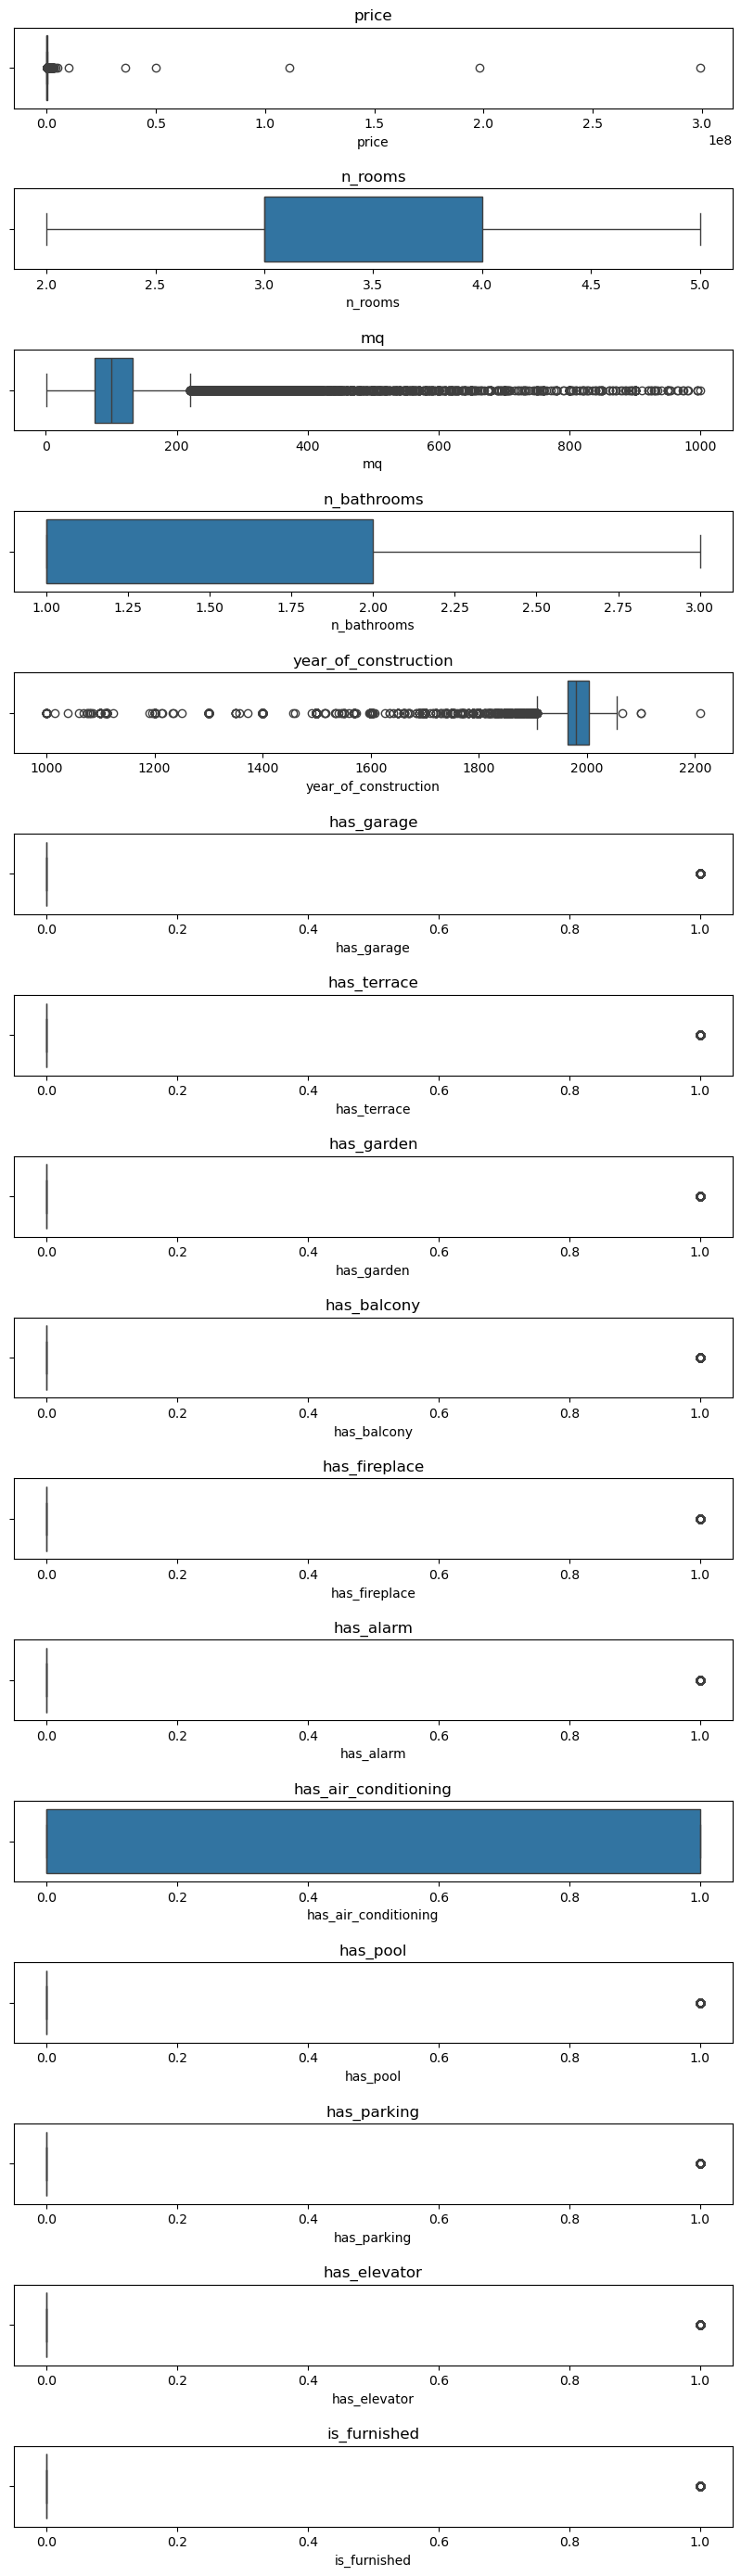

In [131]:
# Generar gráficas individuales pues las variables numéricas están en rangos diferentes sin considerar las variables 'latitude' y 'longitude'
# por sus características

cols_num = ['price', 'n_rooms', 'mq', 'n_bathrooms', 'year_of_construction','has_garage', 'has_terrace','has_garden', 'has_balcony', 'has_fireplace', 
            'has_alarm', 'has_air_conditioning', 'has_pool','has_parking', 'has_elevator', 'is_furnished']
fig, ax = plt.subplots(nrows=len(cols_num), ncols=1, figsize=(10, 35))
fig.subplots_adjust(hspace = 1)

for i, col in enumerate(cols_num):
    sns.boxplot(x=df_clean[col], ax=ax[i])
    ax[i].set_title(col)

plt.show()

A excepción de la columna "year_of_construction", las columnas se observan dentro de sus rangos razonables. En la columna del año de construcción es imposible que existan casas que se hayan construido después de la fecha que se obtuvo la base de datos o el año actual (2024). Eliminaremos las filas que tengan información de años arriba del 2024. Las casa que se construyeron desde el año 1000 pueden tener sentido debido a la antiguedad de la historia de Italia, sobre si estas casas tienen o no aire acondicionado podemos suponer debido a remodelaciones, pero nos mantendremos con las casas construidas entre 1900 y 2024.

In [134]:
#Eliminar filas con "year_of_construction" > 2024
print(f'Tamaño del set antes de eliminar registros: {df_clean.shape}')
df_clean = df_clean[df_clean['year_of_construction']<= 2024]
print(f'Tamaño del set después de eliminar registros: {df_clean.shape}')

Tamaño del set antes de eliminar registros: (87209, 21)
Tamaño del set después de eliminar registros: (87196, 21)


In [136]:
#Eliminar filas con "year_of_construction" < 1900
print(f'Tamaño del set antes de eliminar registros: {df_clean.shape}')
df_clean = df_clean[df_clean['year_of_construction']>= 1900]
print(f'Tamaño del set después de eliminar registros: {df_clean.shape}')

Tamaño del set antes de eliminar registros: (87196, 21)
Tamaño del set después de eliminar registros: (83994, 21)


## Analisis exploratorio 

<Figure size 1400x1000 with 0 Axes>

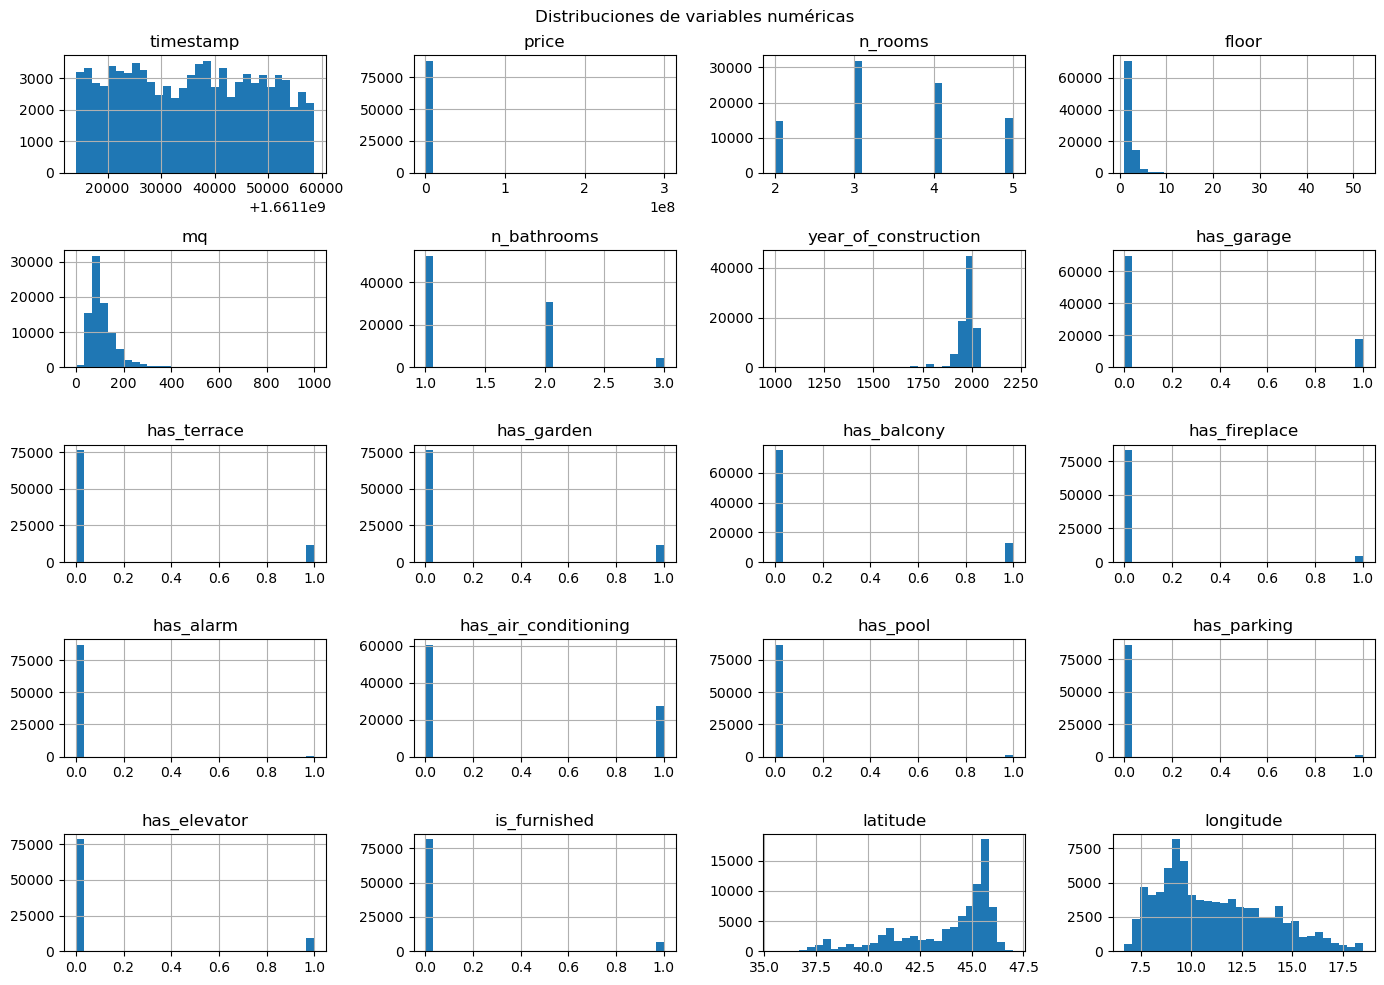

In [154]:
plt.figure(figsize=(14, 10))
df.hist(bins=30, figsize=(14, 10), layout=(5, 4))
plt.suptitle("Distribuciones de variables numéricas")
plt.tight_layout()
plt.show()

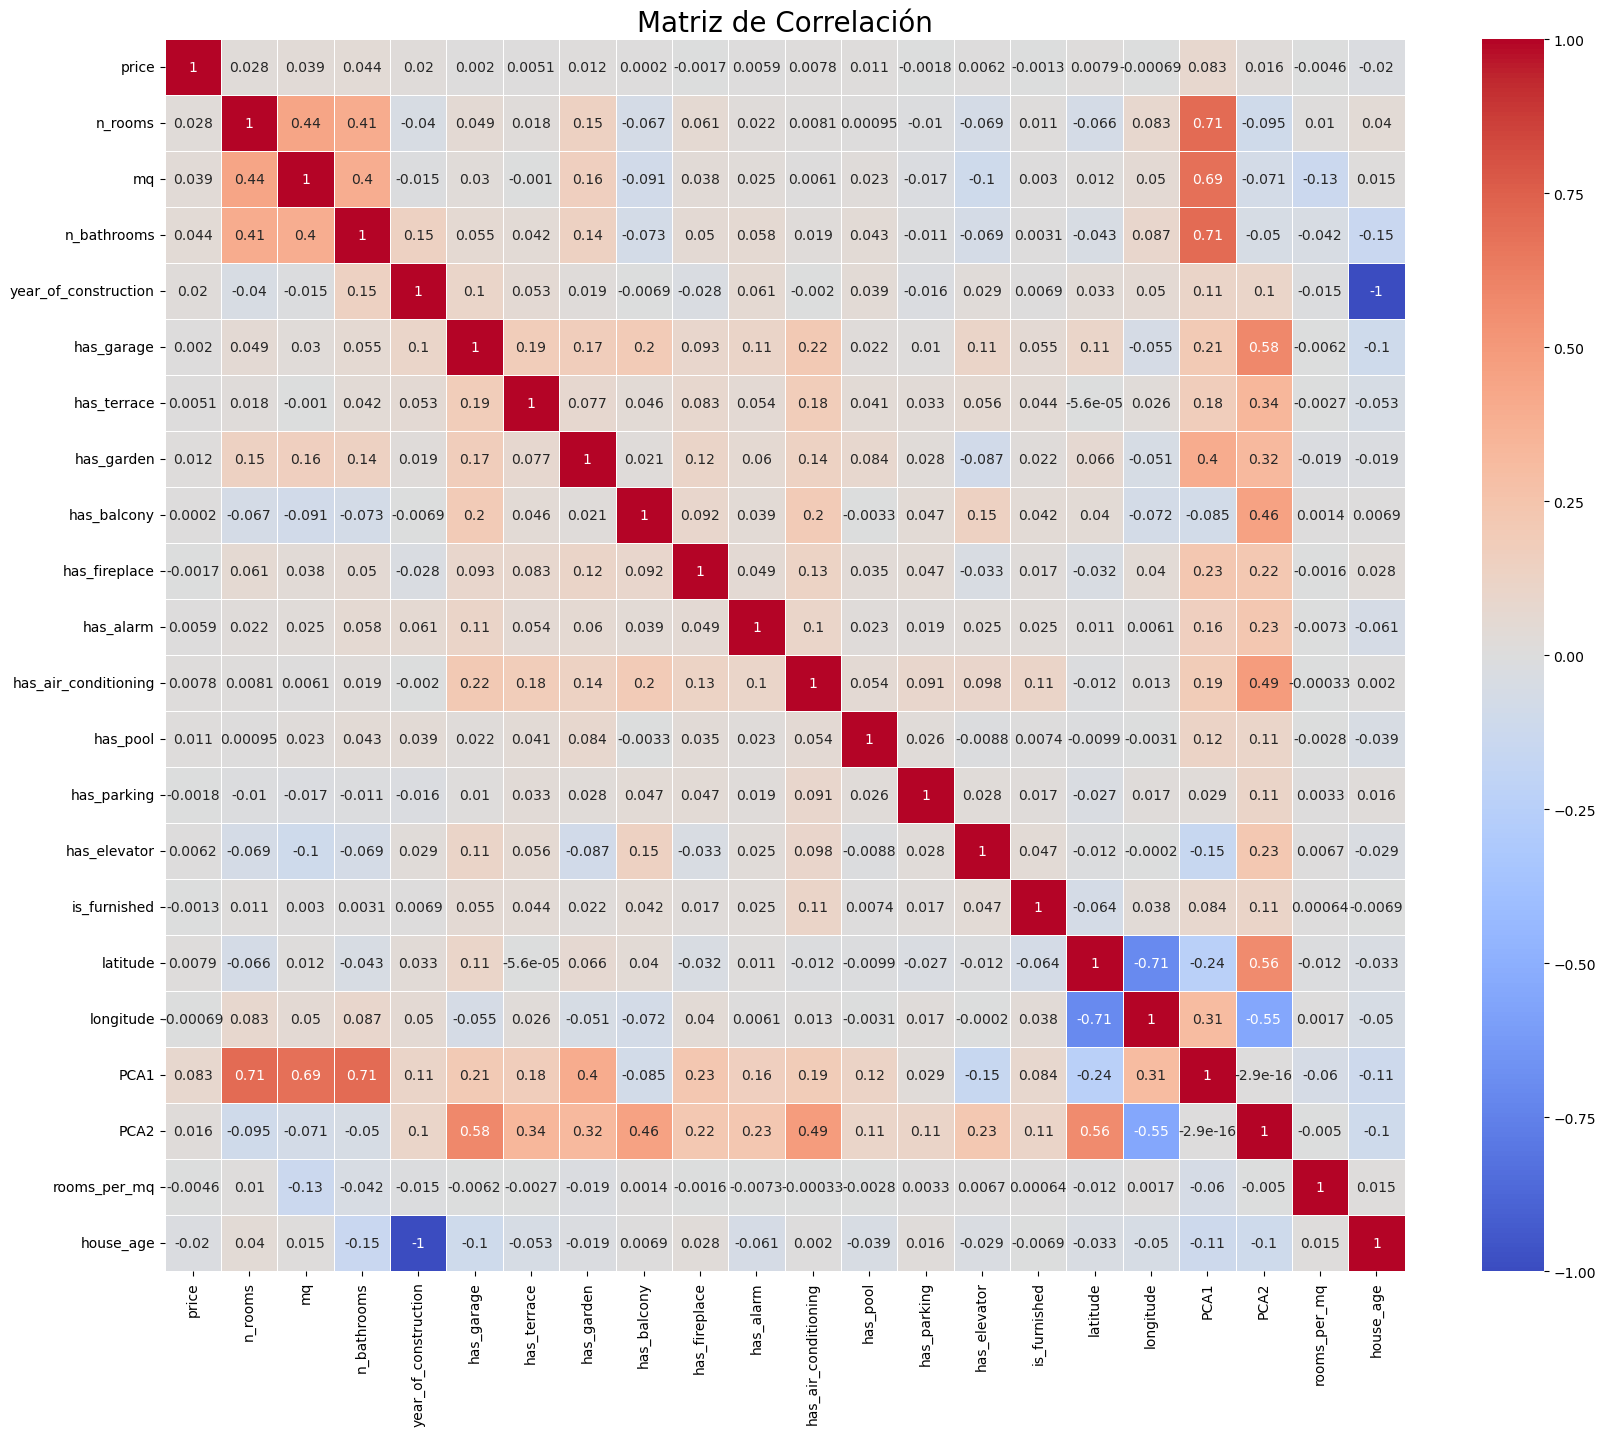

In [240]:
numeric_df = df_clean.select_dtypes(include=[np.number])
correlation_matrix = numeric_df.corr()

# Plotting the correlation heatmap
plt.figure(figsize=(20, 16))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Matriz de Correlación', size=20)
plt.show()

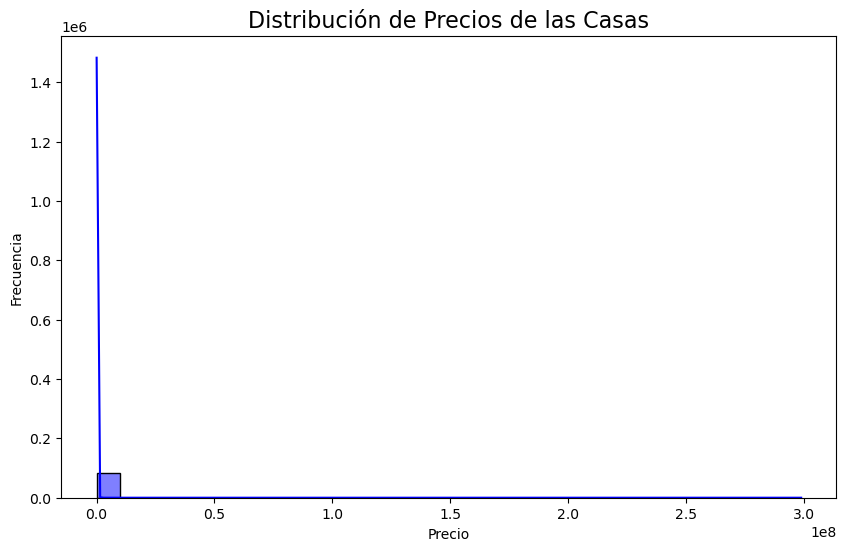

In [174]:
# Análisis de la distribución de precios de las casas
plt.figure(figsize=(10, 6))
sns.histplot(df_clean['price'], kde=True, color='blue', bins=30)
plt.title('Distribución de Precios de las Casas', size=16)
plt.xlabel('Precio')
plt.ylabel('Frecuencia')
plt.show()

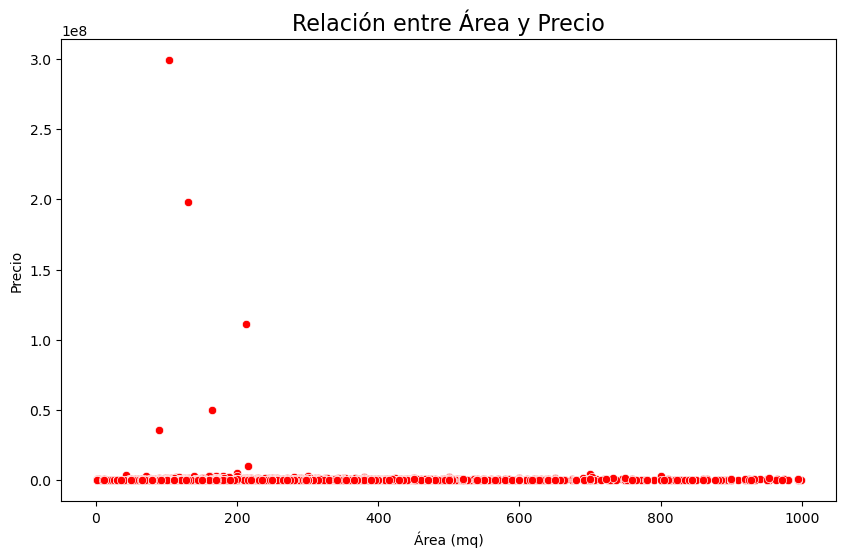

In [180]:
# Scatter plot entre precio y área (suponiendo que hay una columna 'Área')
if 'mq' in df_clean.columns:
    plt.figure(figsize=(10, 6))
    sns.scatterplot(x='mq', y = 'price', data=df_clean, color='red')
    plt.title('Relación entre Área y Precio', size=16)
    plt.xlabel('Área (mq)')
    plt.ylabel('Precio')
    plt.show()


In [189]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 83994 entries, 10 to 213408
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   location              83994 non-null  object 
 1   price                 83994 non-null  float64
 2   n_rooms               83994 non-null  float64
 3   mq                    83994 non-null  float64
 4   n_bathrooms           83994 non-null  float64
 5   year_of_construction  83994 non-null  float64
 6   energy_class          83994 non-null  object 
 7   heating               83994 non-null  object 
 8   has_garage            83994 non-null  int64  
 9   has_terrace           83994 non-null  int64  
 10  has_garden            83994 non-null  int64  
 11  has_balcony           83994 non-null  int64  
 12  has_fireplace         83994 non-null  int64  
 13  has_alarm             83994 non-null  int64  
 14  has_air_conditioning  83994 non-null  int64  
 15  has_pool              

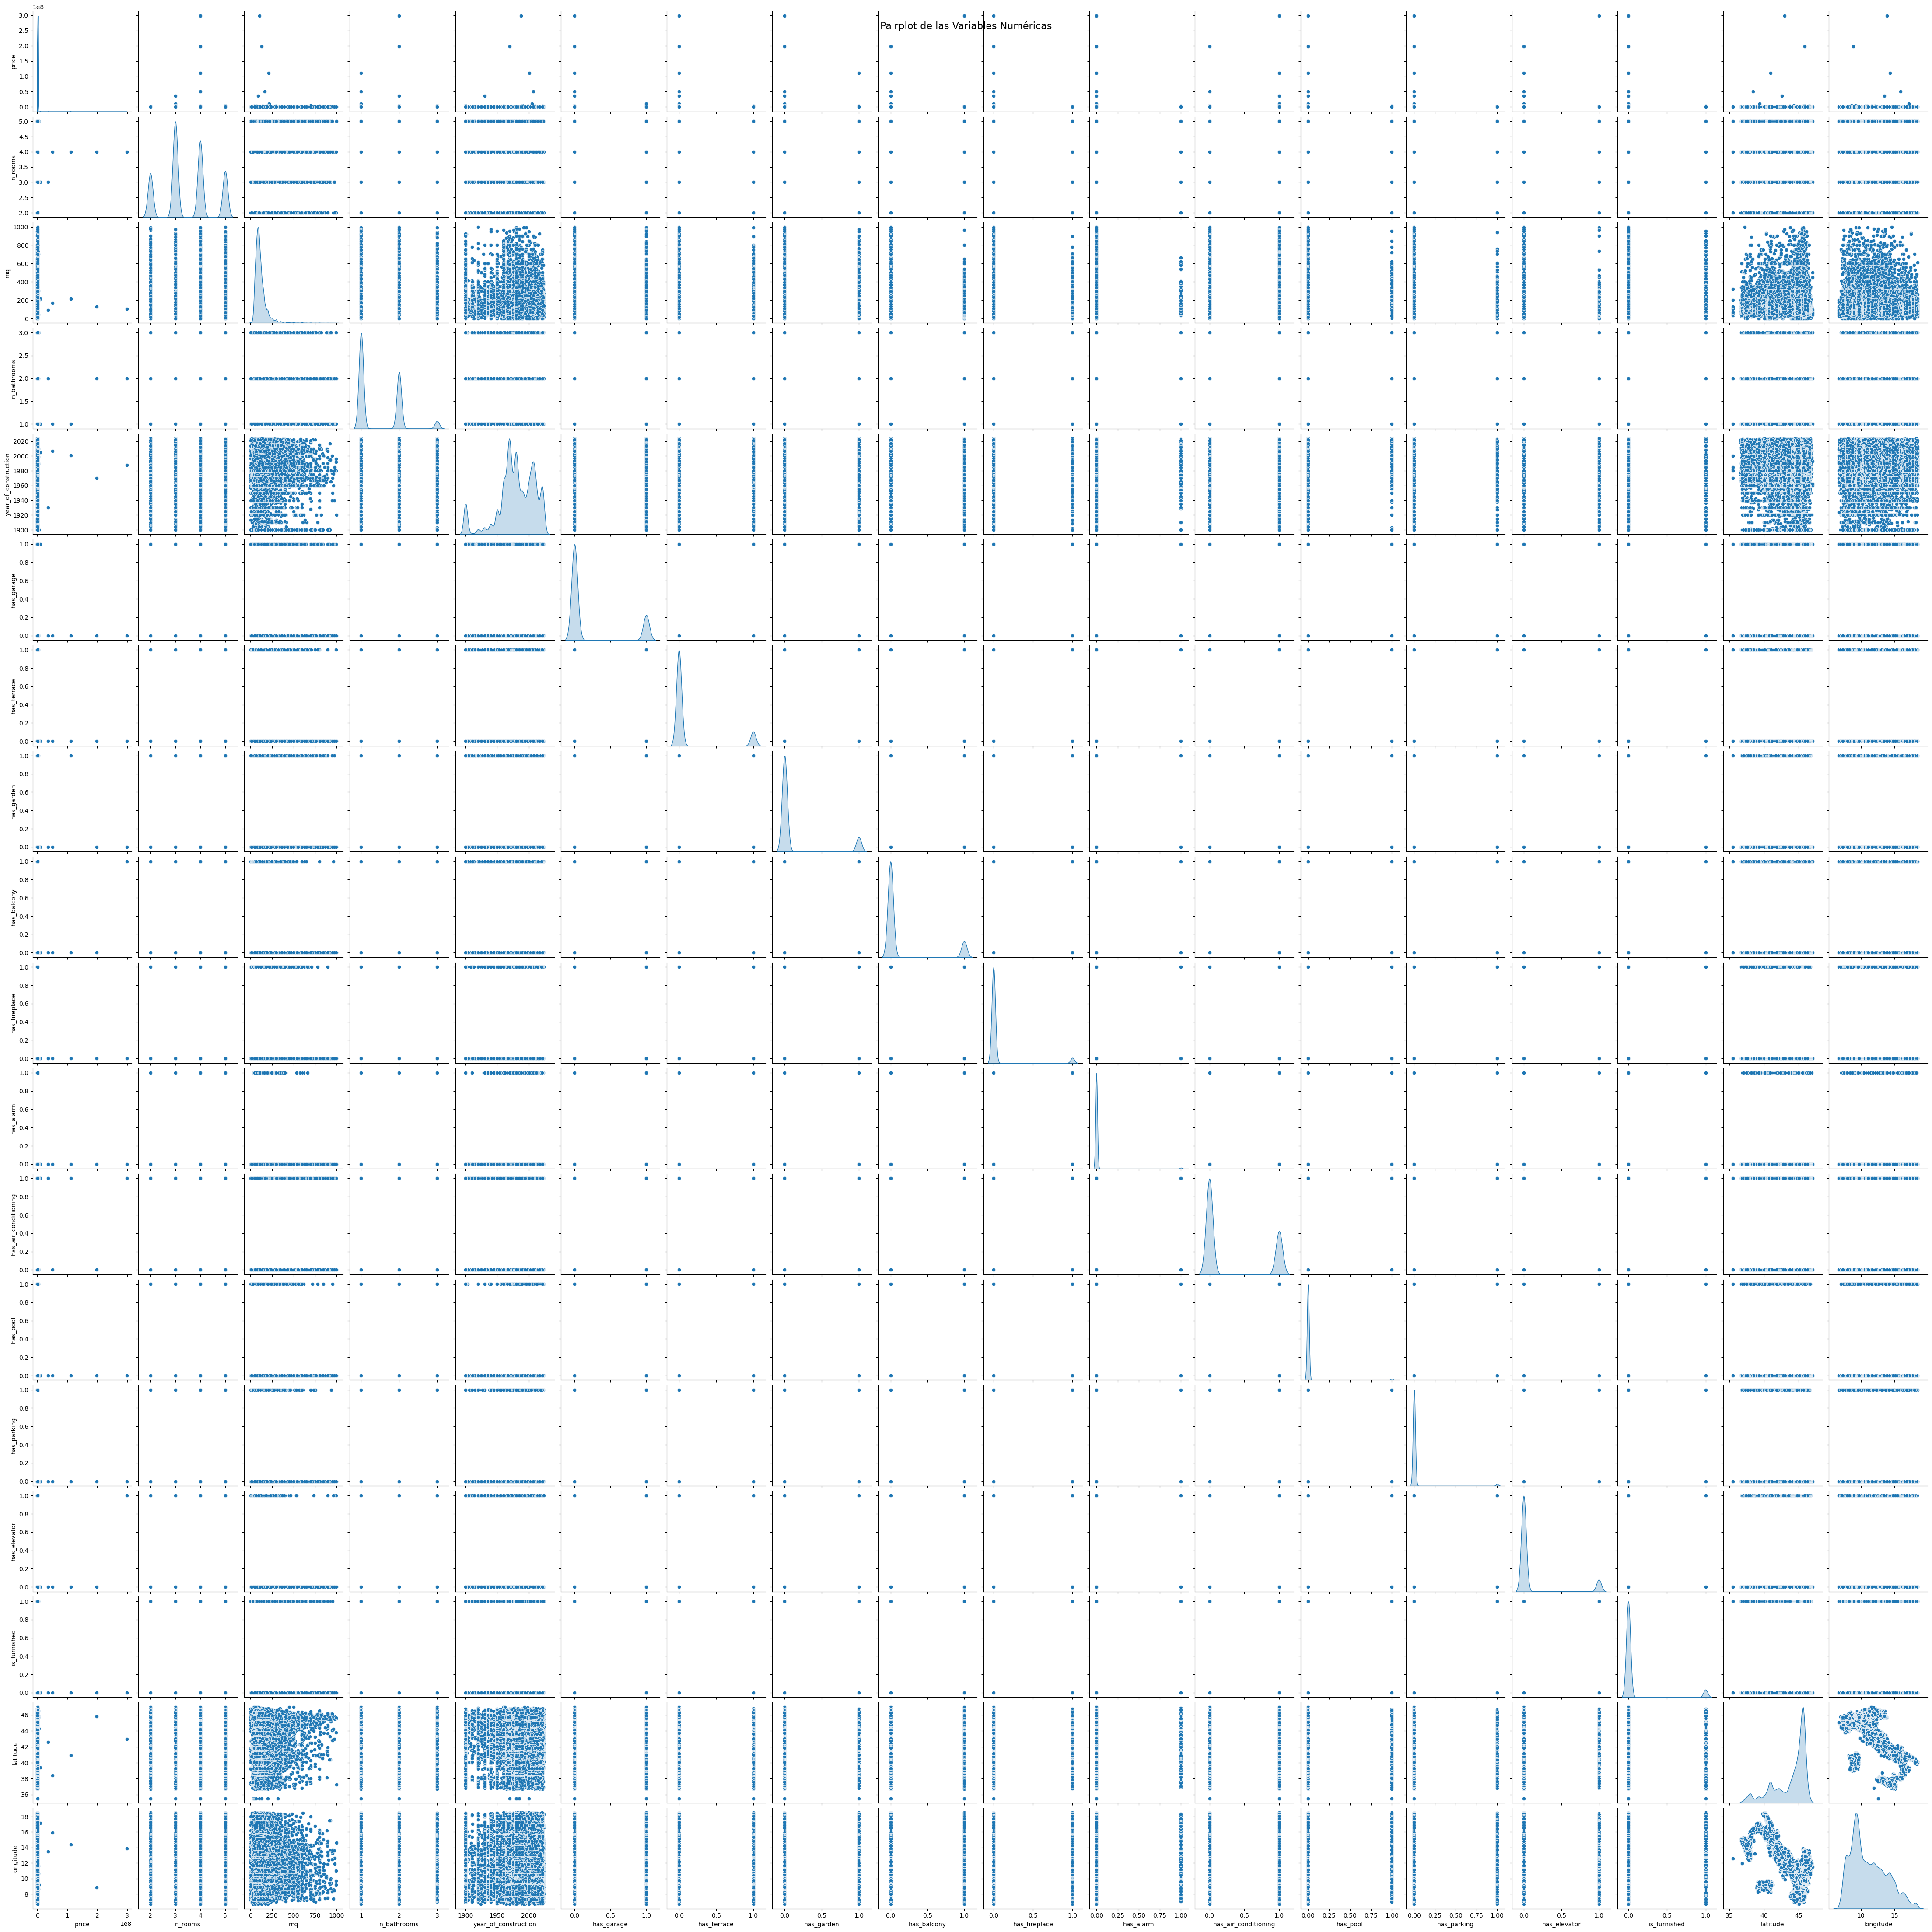

In [184]:
# Análisis de posibles relaciones no lineales con el precio
sns.pairplot(df_clean, diag_kind='kde')
plt.suptitle('Pairplot de las Variables Numéricas', size=16)
plt.show()

# Reduccion de dimensionalidad

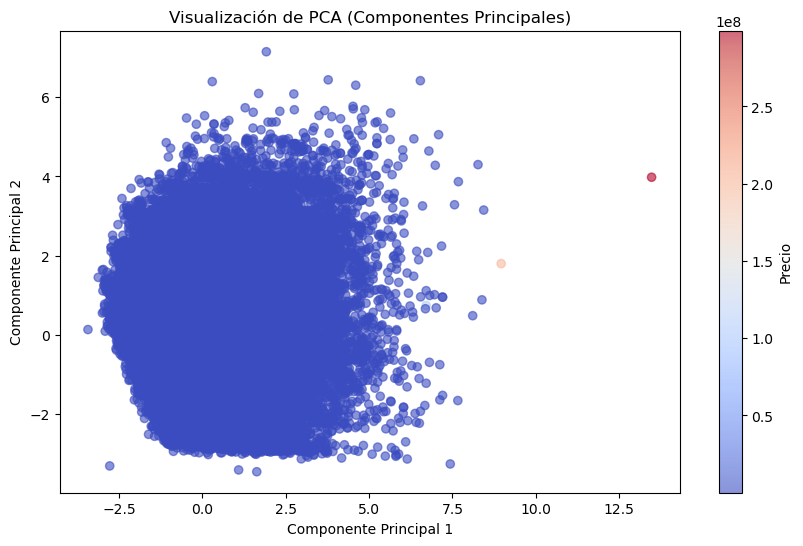

array([0.15225047, 0.14202514])

In [208]:
# Reducción de dimensionalidad (PCA)
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Seleccionamos solo las columnas numéricas
numerical_df = df_clean.select_dtypes(include=['float64', 'int64'])

# Normalizamos los datos numéricos
scaler = StandardScaler()
numerical_scaled = scaler.fit_transform(numerical_df)

# Aplicamos PCA para reducir la dimensionalidad a 2 componentes principales
pca = PCA(n_components=2)
pca_result = pca.fit_transform(numerical_scaled)

# Añadimos los componentes principales al dataframe
df_clean['PCA1'] = pca_result[:, 0]
df_clean['PCA2'] = pca_result[:, 1]

# Visualizamos los resultados del PCA usando plt.scatter
plt.figure(figsize=(10, 6))
scatter = plt.scatter(x=df['PCA1'], y=df['PCA2'], c=df['price'], cmap='coolwarm', alpha=0.6, edgecolor=None)
plt.title('Visualización de PCA (Componentes Principales)')
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')

# Añadimos la barra de colores
plt.colorbar(scatter, label='Precio')
plt.show()

# Explicamos cuánta varianza captura cada componente
explained_variance = pca.explained_variance_ratio_
explained_variance


# Creación de nuevos atributos

In [217]:
# Relación de habitaciones por metro cuadrado
df_clean['rooms_per_mq'] = df_clean['n_rooms'] / df_clean['mq']

# Edad de la casa
df_clean['house_age'] = 2023 - df_clean['year_of_construction']

# Verificar los nuevos atributos
df_clean[['rooms_per_mq', 'house_age']].head()

,rooms_per_mq,house_age
10,0.040323,21.0
13,0.031496,22.0
15,0.044444,73.0
16,0.044444,123.0
17,0.028571,123.0


# Seleccion de caracteristicas

Características eliminadas por alta correlación: []


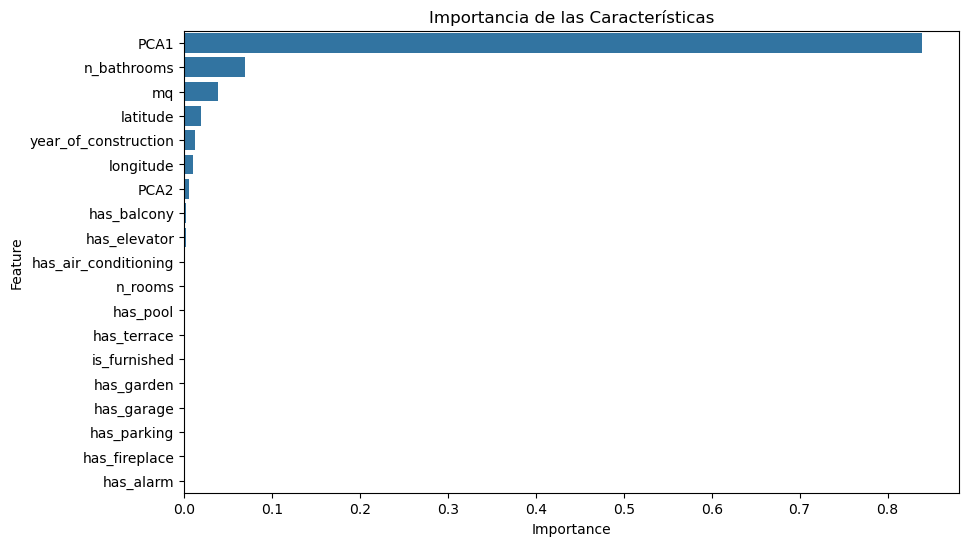

In [230]:
# Filtramos las características que tienen una correlación alta (mayor a un umbral)
threshold = 0.8
upper_triangle = correlation_matrix.where(np.triu(np.ones(correlation_matrix.shape), k=1).astype(bool))
features_to_drop = [column for column in upper_triangle.columns if any(upper_triangle[column] > threshold)]

# Eliminamos las características que están altamente correlacionadas
df_reduced = numerical_df.drop(columns=features_to_drop)
print(f'Características eliminadas por alta correlación: {features_to_drop}')

# Selección de características basada en un modelo de árbol de decisión
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

# Definimos las características (X) y la variable objetivo (y)
X = df_reduced.drop(columns=['price'])  
y = df_reduced['price']

# Dividimos el dataset en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Entrenamos un modelo de Random Forest
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Extraemos las importancias de las características
importances = model.feature_importances_
features = X_train.columns

# Ordenamos las características por importancia
feature_importance = pd.DataFrame({'Feature': features, 'Importance': importances})
feature_importance = feature_importance.sort_values(by='Importance', ascending=False)

# Visualizamos la importancia de las características
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance)
plt.title('Importancia de las Características')
plt.show()


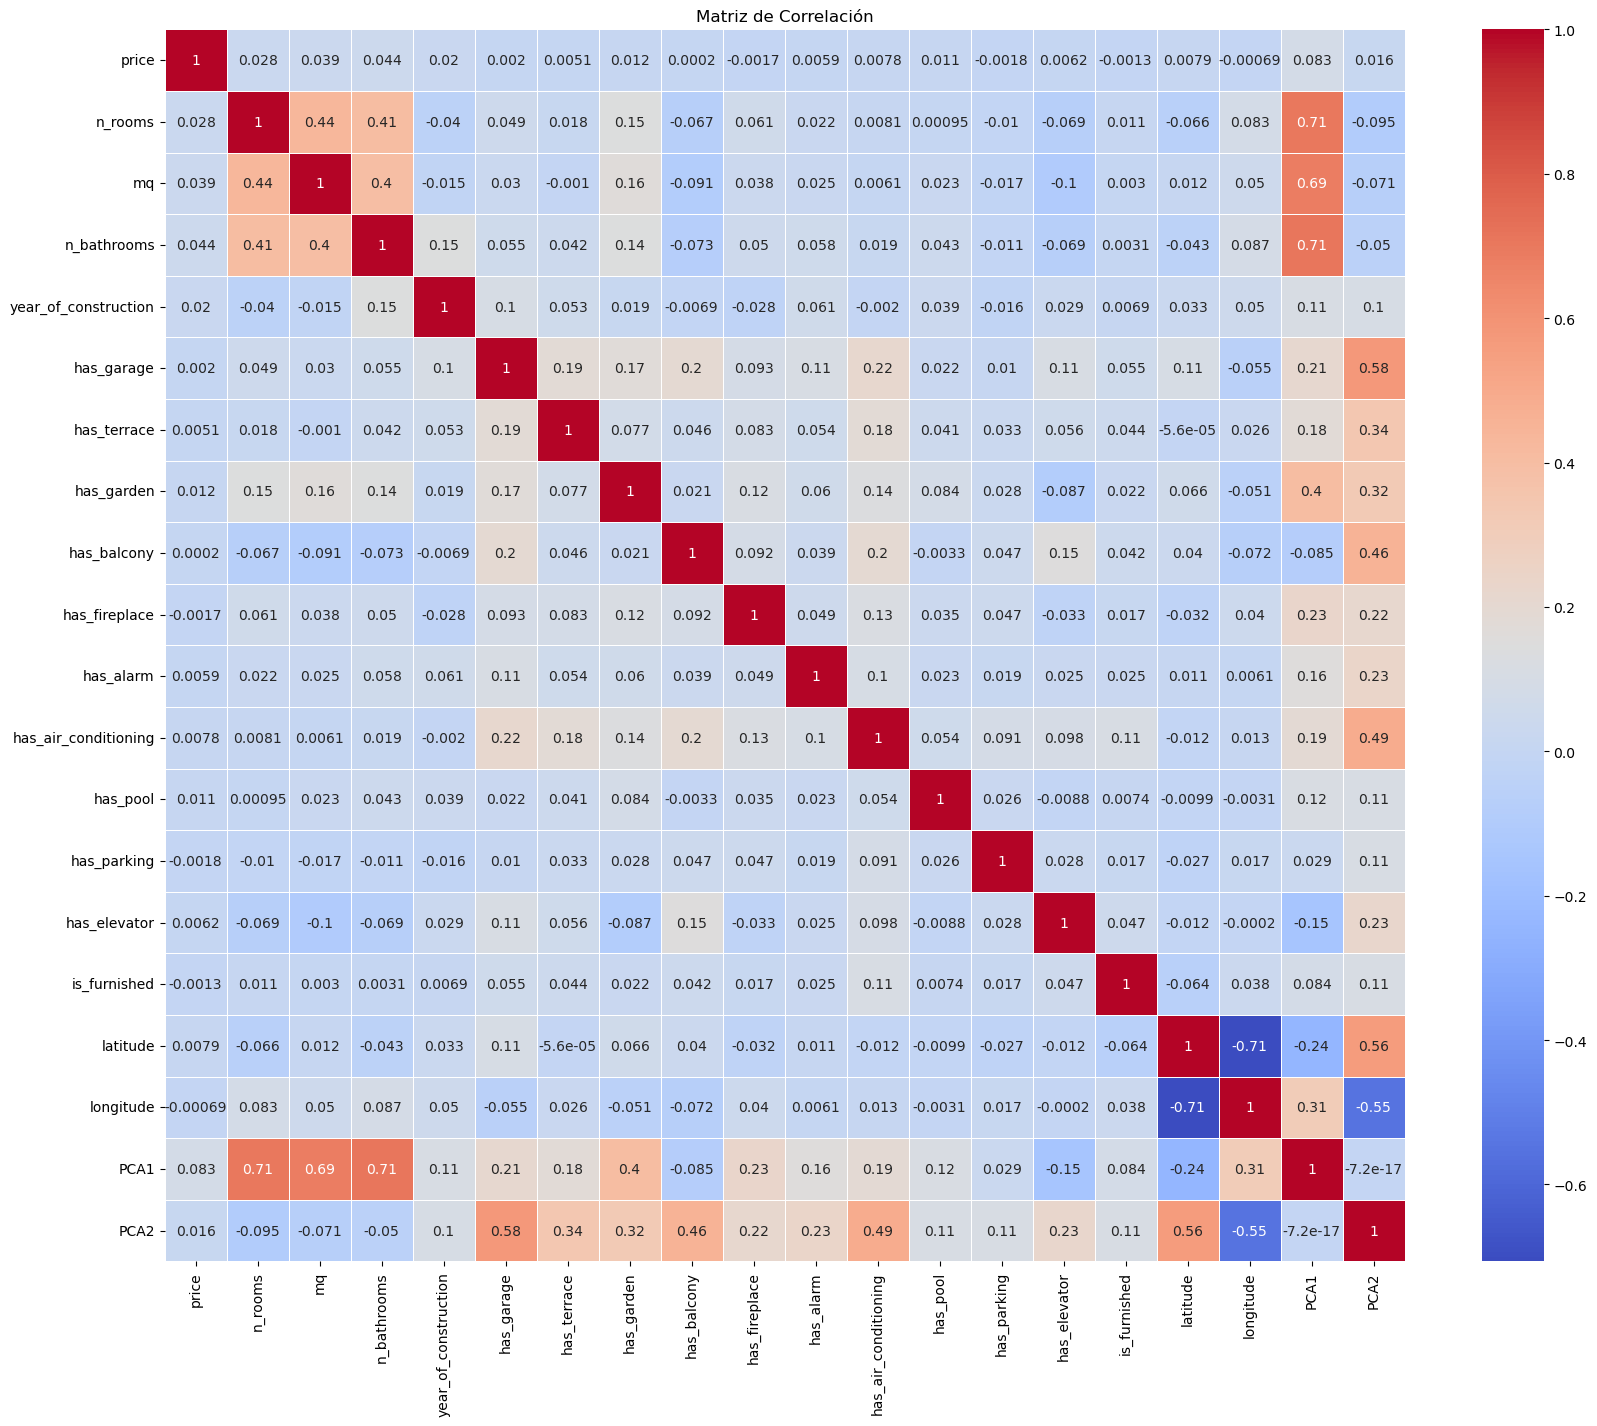

Características eliminadas por alta correlación: []


In [248]:
# Calculamos la matriz de correlación
correlation_matrix = numerical_df.corr()

# Visualizamos la matriz de correlación
plt.figure(figsize=(20, 16))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Matriz de Correlación')
plt.show()

# Filtramos las características que tienen una correlación alta (mayor a un umbral)
threshold = 0.8 
upper_triangle = correlation_matrix.where(np.triu(np.ones(correlation_matrix.shape), k=1).astype(bool))
features_to_drop = [column for column in upper_triangle.columns if any(upper_triangle[column] > threshold)]

# Eliminamos las características que están altamente correlacionadas
df_reduced = numerical_df.drop(columns=features_to_drop)
print(f'Características eliminadas por alta correlación: {features_to_drop}')

# Entrenar 4 modelos

In [253]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

# División en conjunto de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Entrenar el modelo de regresión lineal
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

# Predicciones y evaluación
y_pred_train = linear_model.predict(X_train)
y_pred_test = linear_model.predict(X_test)

# Métrica R² para el conjunto de entrenamiento y prueba
print(f"R² en conjunto de entrenamiento: {r2_score(y_train, y_pred_train):.4f}")
print(f"R² en conjunto de prueba: {r2_score(y_test, y_pred_test):.4f}")


from sklearn.linear_model import Ridge
from sklearn.tree import DecisionTreeRegressor

# Ridge Regression
ridge_model = Ridge()
ridge_model.fit(X_train, y_train)
ridge_pred_test = ridge_model.predict(X_test)
print(f"R² Ridge en conjunto de prueba: {r2_score(y_test, ridge_pred_test):.4f}")

# Lasso Regression
lasso_model = Lasso()
lasso_model.fit(X_train, y_train)
lasso_pred_test = lasso_model.predict(X_test)
print(f"R² Lasso en conjunto de prueba: {r2_score(y_test, lasso_pred_test):.4f}")

# Decision Tree Regressor
tree_model = DecisionTreeRegressor()
tree_model.fit(X_train, y_train)
tree_pred_test = tree_model.predict(X_test)
print(f"R² Decision Tree en conjunto de prueba: {r2_score(y_test, tree_pred_test):.4f}")


R² en conjunto de entrenamiento: 1.0000
R² en conjunto de prueba: 1.0000
R² Ridge en conjunto de prueba: 0.9996


/opt/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.602e+14, tolerance: 1.458e+13
  model = cd_fast.enet_coordinate_descent(


R² Lasso en conjunto de prueba: 0.9965
R² Decision Tree en conjunto de prueba: -59.1297


### Conclusiones

Sinceramente no confio en los resultados